In [17]:
using Statistics
using Distributions
using Plots
using LinearAlgebra

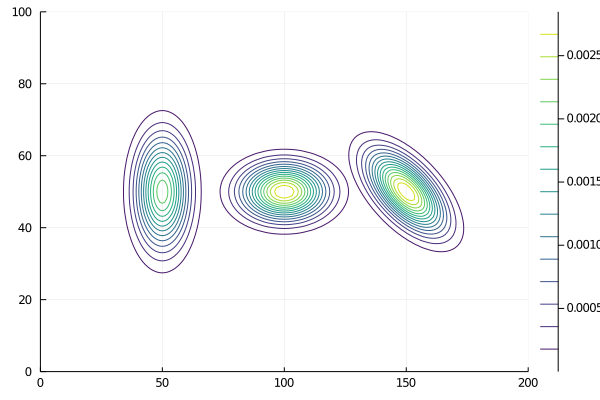

In [14]:
x = range(0,200, step=1)
y = range(0, 100, step=1)

a = MvNormal([50,50], [50 0 ; 0 100])
b = MvNormal([100,50], [125 0 ; 0 25])
c = MvNormal([150,50], [100 -25*sqrt(3) ; -25*sqrt(3) 50])

Plots.contour(x, y, [pdf(a,[i, j]) for j in y, i in x], color=:viridis)
Plots.contour!(x, y, [pdf(b,[i, j]) for j in y, i in x], color=:viridis)
Plots.contour!(x, y, [pdf(c,[i, j]) for j in y, i in x], color=:viridis)

In [76]:
eig_vals= eigvals(c.Σ)
eig_vec = eigvecs(c.Σ)

println("eig_vals:", eig_vals)
println("eig_vec:", eig_vec)
println("固有ベクトル1:", eig_vec[1,:])
println("固有ベクトル2:", eig_vec[2,:])

eig_vals:[25.0, 125.0]
eig_vec:[-0.5 -0.8660254037844387; -0.8660254037844387 0.5]
固有ベクトル1:[-0.5, -0.8660254037844387]
固有ベクトル2:[-0.8660254037844387, 0.5]


In [77]:
eig_vec .*= -1

2×2 Array{Float64,2}:
 0.5        0.866025
 0.866025  -0.5

In [91]:
Plots.contour(x, y, [pdf(c,[i, j]) for j in y, i in x], color=:viridis, aspect_ratio=:equal)
quiver!([c.μ[1]], [c.μ[2]], quiver=([eig_vec[1,1]*2*sqrt(eig_vals[1])],
        [eig_vec[1,2]*2*sqrt(eig_vals[1])]), color="blue")
quiver!([c.μ[1]], [c.μ[2]], quiver=([eig_vec[2,1]*2*sqrt(eig_vals[2])],
        [eig_vec[2,2]*2*sqrt(eig_vals[2])]), color="red")
ylims!((0,100))
xlims!((0,200))